<a href="https://colab.research.google.com/github/Dharmesh-Poriya07/Machine-Learning-Practicals/blob/main/Practical-06/Practical_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical-06** : Tweet Sentiment Analysis using Bayesian Network

### **Objective** : Perform Sentiment Analysis on Twitter Dataset using Bayesian Network

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
document = ["The greatest glory in living lies not in never falling, but in rising every time we fall.",
            "The way to get started is to quit talking and begin doing.",
            "Your time is limited, so don't waste it living someone else's life.",
            "If life were predictable it would cease to be life, and be without flavor."]

> ## vectorization

In [ ]:
vectorizer = CountVectorizer()

vectorizer.fit(document)

CountVectorizer()

In [ ]:
print("Vocabulary: ", vectorizer.vocabulary_)
vector = vectorizer.transform(document)

print("Vectorizer Output:")
print(vector.toarray())

Vocabulary:  {'the': 32, 'greatest': 14, 'glory': 13, 'in': 16, 'living': 22, 'lies': 19, 'not': 24, 'never': 23, 'falling': 10, 'but': 3, 'rising': 27, 'every': 8, 'time': 33, 'we': 37, 'fall': 9, 'way': 36, 'to': 34, 'get': 12, 'started': 30, 'is': 17, 'quit': 26, 'talking': 31, 'and': 0, 'begin': 2, 'doing': 5, 'your': 41, 'limited': 21, 'so': 28, 'don': 6, 'waste': 35, 'it': 18, 'someone': 29, 'else': 7, 'life': 20, 'if': 15, 'were': 38, 'predictable': 25, 'would': 40, 'cease': 4, 'be': 1, 'without': 39, 'flavor': 11}
Vectorizer Output:
[[0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 3 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0
  0 1 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 2 0
  1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
  0 0 0 0 0 1]
 [1 2 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 1 1 1 0]]


> ## **Twitter Sentiment Analysis**

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

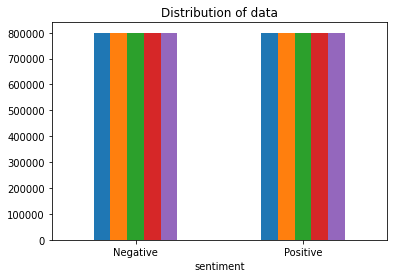

In [ ]:
DATASET_COLUMNS=['sentiment','ids','date','flag','user','text']
twitter = pd.read_csv('/content/drive/MyDrive/Labs/Sem6_Labs/ML/Lab06/training.1600000.processed.noemoticon.csv', encoding = 'latin', names=DATASET_COLUMNS)

twitter["sentiment"] = twitter["sentiment"].replace(4,1)

ax = twitter.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

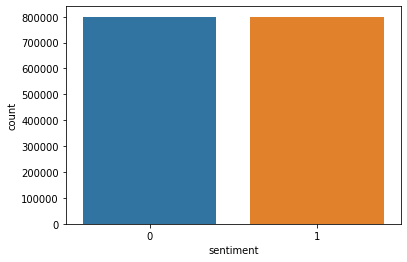

In [ ]:
# plotting the data using countplot
sns.countplot(x = "sentiment", data = twitter)

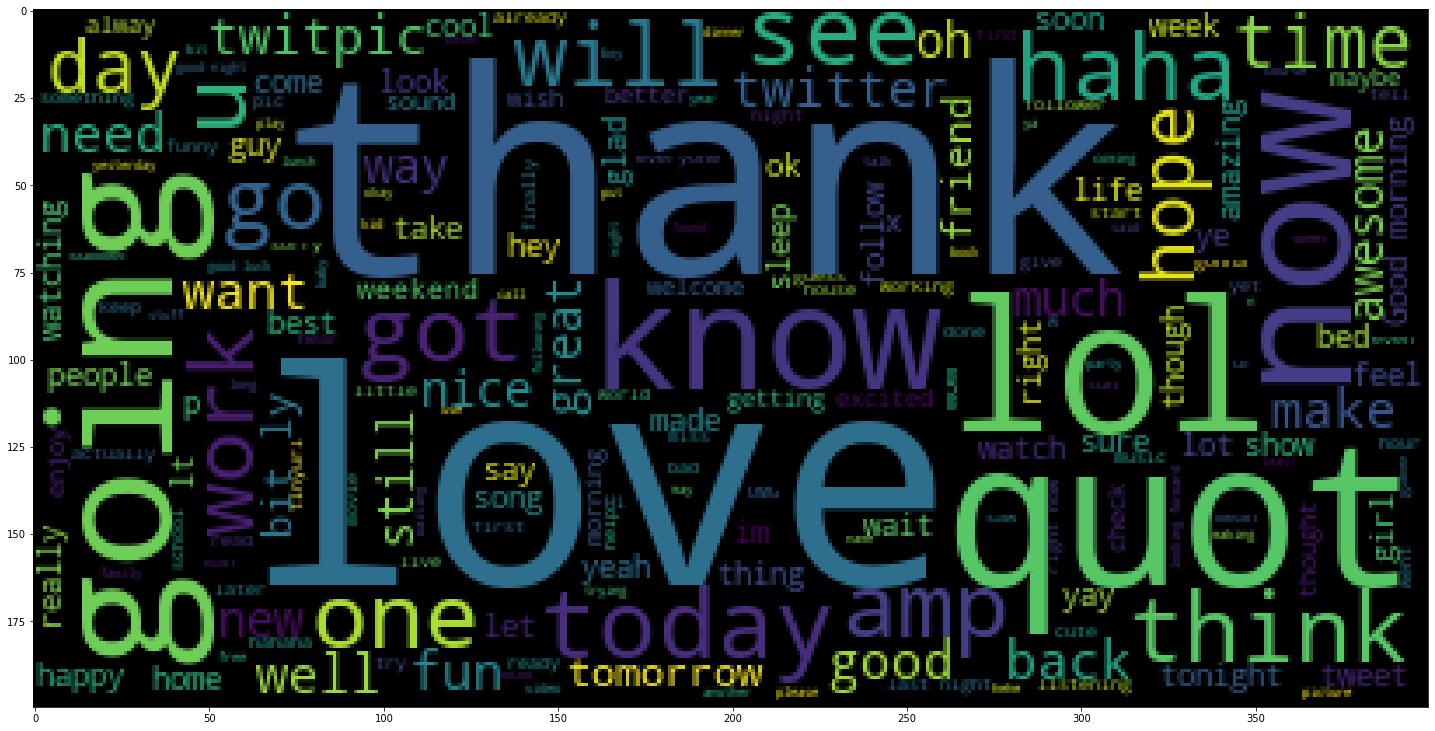

In [ ]:
#creating a string of positive tweets to analyze the words
positive_tweets = twitter[twitter['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(25,25))
plt.imshow(WordCloud().generate(positive_tweets_string))

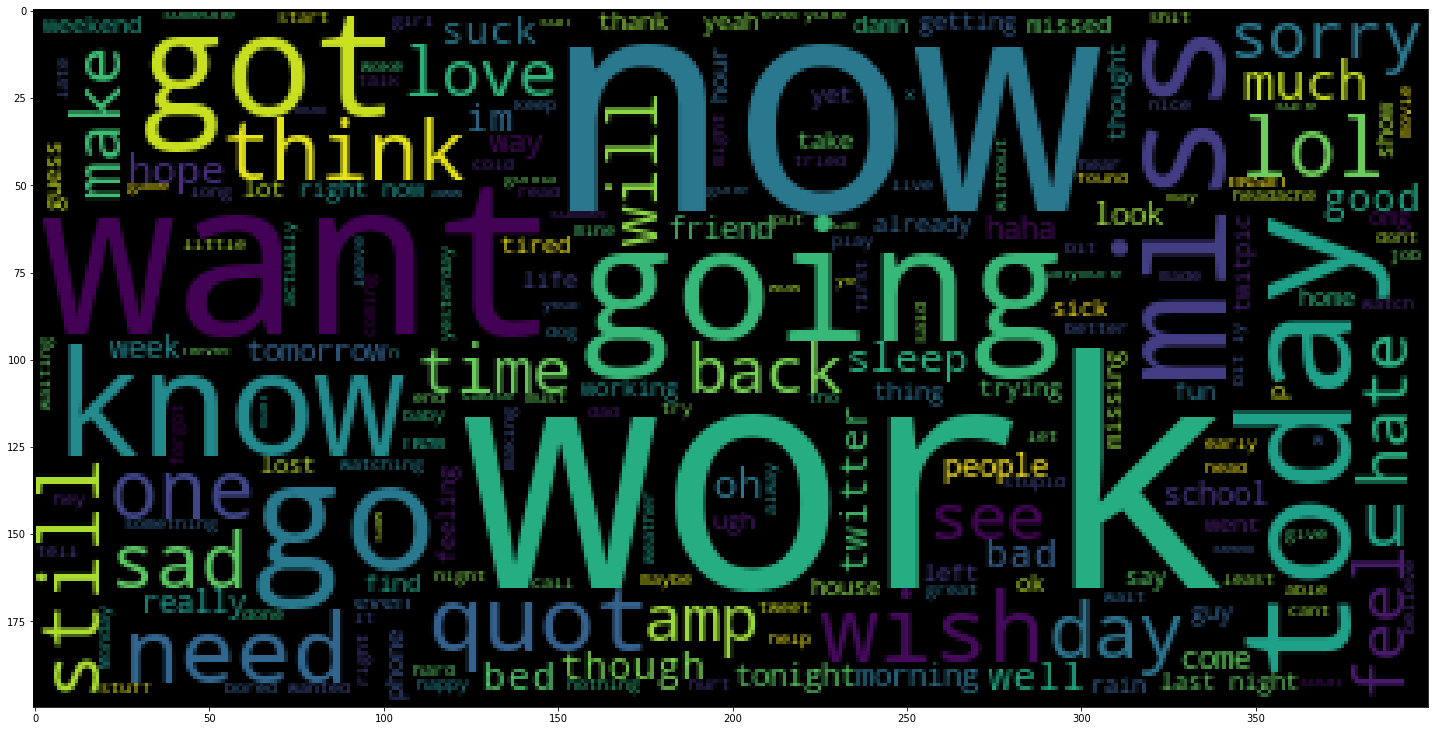

In [ ]:
# creating the string of negative tweets to analyze the words
negative_tweets = twitter[twitter['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(25,25))
plt.imshow(WordCloud().generate(negative_tweets_string))

> ## **PreProcessing**

In [ ]:
#remove url
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

twitter['text'] = twitter['text'].apply(lambda x: cleaning_URLs(x))

In [ ]:
#stopwordlist
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

coun_vect = CountVectorizer(stop_words=stopwordlist,max_df=1000,max_features = 200)
count_matrix = coun_vect.fit_transform(twitter['text'])
count_array = count_matrix.toarray()
twitter_ = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
twitter_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,09,21,2morrow,4th,abt,access,accident,across,addicted,...,voted,walked,wash,waste,wee,weight,weren,winter,workin,worries
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X= twitter_
y= twitter["sentiment"]
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =261051234)
X_train
# y_train

,000,09,21,2morrow,4th,abt,access,accident,across,addicted,...,voted,walked,wash,waste,wee,weight,weren,winter,workin,worries
1010152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1089589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> ## multinomial naive bayes

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2681, 37451],
       [ 1453, 38415]])

>> ### precision, recall and accuracy

In [ ]:
precision_score(y_test, y_pred), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred), f1_score(y_test,  y_pred)

(0.5063533071468115, 0.5137, 0.9635547306110164, 0.6638498626159989)

> ## Decision Tree classfier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2969, 37163],
       [ 1749, 38119]])

>> ### precision, recall and accuracy

In [ ]:
precision_score(y_test, y_pred), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred), f1_score(y_test,  y_pred)

(0.5063494593661167, 0.5136, 0.956130229758202, 0.6620755536257057)